In [18]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report 
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
bank = pd.read_csv("bank-full.csv",sep=";")

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [4]:
for i in range(1,17):
    bank.iloc[:,i] = LE.fit_transform(bank.iloc[:,i])

In [5]:
X = bank.iloc[:,1:16]
Y = bank["y"]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [7]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [8]:
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X)

In [9]:
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [11]:
confusion_matrix = (Y,Y_pred)
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)

ac = accuracy_score(Y,Y_pred)
print('Accuracy score:',ac.round(2))
rs = recall_score(Y,Y_pred)
print('Sensitivity_score:', rs.round(2))
ps = precision_score(Y,Y_pred)
print('Precision_score:',ps.round(2))
f1 = f1_score(Y,Y_pred)
print('f1_score:', f1.round(2))

Accuracy score: 0.89
Sensitivity_score: 0.19
Precision_score: 0.53
f1_score: 0.28


In [12]:
print("Training accuracy:",ac1.round(3))
print("Testing accuracy:",ac2.round(3))

Training accuracy: 0.887
Testing accuracy: 0.882


<AxesSubplot:xlabel='y', ylabel='balance'>

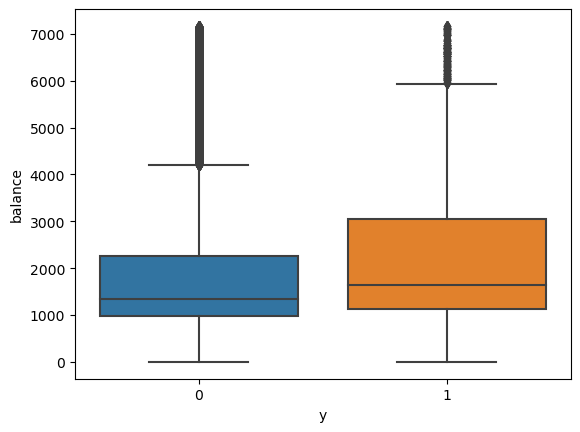

In [22]:
sb.boxplot(x="y",y="balance",data=bank)

<AxesSubplot:xlabel='y', ylabel='age'>

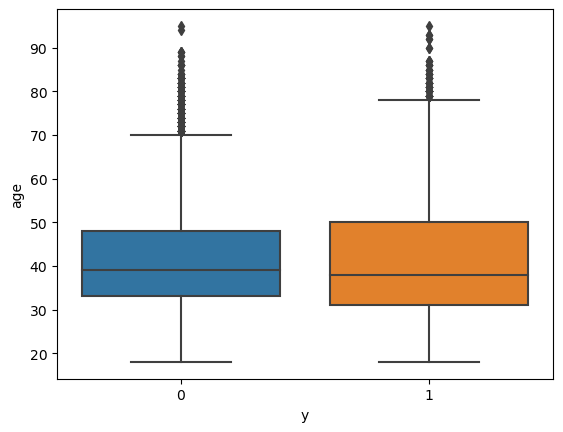

In [23]:
sb.boxplot(x="y",y="age",data=bank)

<AxesSubplot:xlabel='y', ylabel='pdays'>

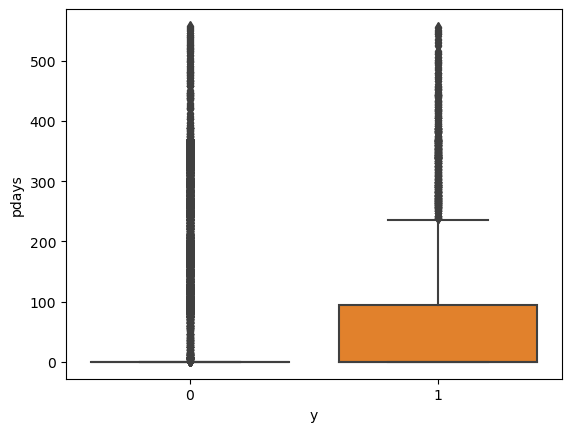

In [24]:
sb.boxplot(x="y",y="pdays",data=bank)

In [13]:
train_error=[]
test_error=[]

for i in range(1,50):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=(i))
    LR = LogisticRegression()
    LR.fit(X_train,Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    train_error.append(accuracy_score(Y_train,Y_pred_train))
    test_error.append(accuracy_score(Y_test,Y_pred_test))
    

In [14]:
print("Training Mse:",np.sqrt(np.mean(train_error)))
print("Testing Mse:",np.sqrt(np.mean(test_error)))

Training Mse: 0.9413949786979101
Testing Mse: 0.9416221337305957


In [15]:
pd.set_option("display.max.columns",None)
bank1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,contact_0,contact_1,contact_2,poutcome_0,poutcome_1,poutcome_2,poutcome_3,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,58,0,3036,1,0,4,261,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,945,1,0,4,151,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,918,1,1,4,76,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,2420,1,0,4,92,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,917,0,0,4,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1741,0,0,16,975,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,2639,0,0,16,456,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5455,0,0,16,1116,4,181,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,1584,0,0,16,508,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
bank1['default'] = np.where(bank1['default'].str.contains("yes"), 1,0)
bank1['housing'] = np.where(bank1['housing'].str.contains("yes"), 1, 0)
bank1['loan'] = np.where(bank1['loan'].str.contains("yes"), 1, 0)
bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)


AttributeError: Can only use .str accessor with string values!

In [20]:
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,contact_0,contact_1,contact_2,poutcome_0,poutcome_1,poutcome_2,poutcome_3,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,58,0,3036,1,0,4,261,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,945,1,0,4,151,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,918,1,1,4,76,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,2420,1,0,4,92,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,917,0,0,4,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1741,0,0,16,975,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,2639,0,0,16,456,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5455,0,0,16,1116,4,181,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,1584,0,0,16,508,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
x=pd.concat([bank1.iloc[:,0:10],bank1.iloc[:,11:]],axis=1)
y=bank1.iloc[:,10]

In [22]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [23]:
classifier.coef_ 

array([[-2.33087123e-02, -2.45982365e-02,  5.42745526e-05,
        -8.80064773e-01, -2.52799407e-01, -1.24047345e-02,
         4.15580413e-03, -3.96000435e-01,  1.98458422e-03,
        -1.05691516e-01, -4.19259536e-02, -3.34378097e-01,
        -3.41653973e-02, -9.85037615e-03, -1.91083115e-03,
         2.22403365e-01, -2.21104827e-02, -1.19220557e-01,
         2.84541926e-02, -1.00739376e-01,  2.95372396e-03,
         3.37591109e-03,  2.59306505e-02, -2.19562597e-01,
        -2.13481931e-01, -8.43155029e-02, -3.77552704e-01,
         3.80321171e-02,  1.67222121e-02,  7.61404555e-02,
         6.73432385e-02, -5.50597572e-01, -1.64265469e-01,
        -4.30440191e-02,  3.90033903e-01, -5.89838293e-01,
         4.96660755e-02,  2.14294644e-02,  3.62592086e-02,
        -2.52444896e-02, -1.44164409e-02, -1.16043939e-01,
        -7.65857974e-02,  1.08518159e-01, -5.43594435e-01,
        -6.67647759e-02,  1.25951793e-01,  9.37112988e-02]])

In [24]:
classifier.predict_proba (x)

array([[0.96466024, 0.03533976],
       [0.98303354, 0.01696646],
       [0.98672443, 0.01327557],
       ...,
       [0.24362187, 0.75637813],
       [0.92025792, 0.07974208],
       [0.83467185, 0.16532815]])

In [25]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
y_pred_df=pd.DataFrame({'actual_yval':y,'y_pred_prob':y_pred})
y_pred_df

,actual_yval,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix) 

[[39039   883]
 [ 3960  1329]]


In [29]:
pd.crosstab(y_pred,y)  

y,0,1
row_0,,
0,39039,3960
1,883,1329


In [30]:
accuracy = sum(y==y_pred)/bank1.shape[0]
accuracy 

0.8928800513149455

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.25      0.35      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.65     45211
weighted avg       0.87      0.89      0.87     45211

